In [1]:
import torch
import os
import toml
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torchinfo import summary

In [2]:
from utils import (
    device,
    train_transforms,test_transforms,
    train,test,
    train_losses,test_losses,train_acc,test_acc
    )
from model import Net

In [3]:
config = toml.load('config.toml')

In [4]:
DATAPATH:str = os.path.join(r"C:\Users\muthu\GitHub\DATA 📁")

# Dataset
train_data = datasets.MNIST(DATAPATH, train=True, download=False, transform=train_transforms)
test_data = datasets.MNIST(DATAPATH, train=False, download=False, transform=test_transforms)

In [5]:
kwargs = {
    'batch_size': config['batch_size'],
    'shuffle'   : config['shuffle'],
    'num_workers':config['num_workers'],
    'pin_memory': config['pin_memory']
}

test_loader = torch.utils.data.DataLoader(test_data,**kwargs)
train_loader = torch.utils.data.DataLoader(train_data,**kwargs)

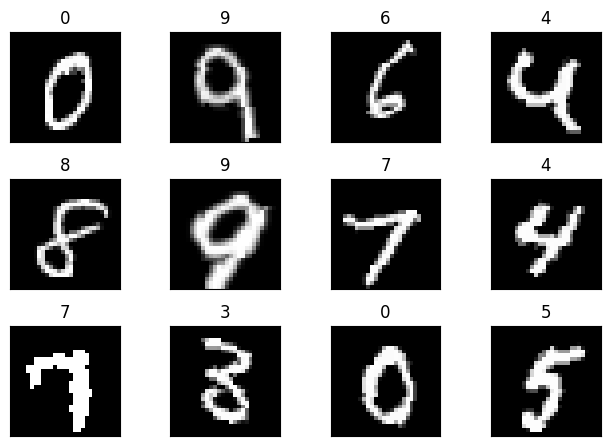

In [6]:
batch_data, batch_label = next(iter(train_loader)) 
fig = plt.figure()
for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])
plt.show()

In [7]:
model = Net().to(device)

In [8]:
optimizer = torch.optim.SGD(
    model.parameters(), 
    lr=config['optimizer'].get('lr'), 
    momentum=config['optimizer'].get('momentum'),
)

scheduler = torch.optim.lr_scheduler.StepLR(
    optimizer, 
    step_size=config['scheduler'].get('step_size') , 
    gamma=config['scheduler'].get('gamma'), 
    verbose=True
)

criterion = torch.nn.functional.nll_loss

c:\Users\muthu\miniconda3\envs\venv\lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


In [9]:
num_epochs = config['training'].get('num_epochs')

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, test_loader, criterion)
  scheduler.step()

Epoch 1


  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0570, Accuracy: 9814/10000 (98.14%)

Epoch 2


  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0382, Accuracy: 9878/10000 (98.78%)

Epoch 3


  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0293, Accuracy: 9899/10000 (98.99%)

Epoch 4


  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0288, Accuracy: 9905/10000 (99.05%)

Epoch 5


  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0211, Accuracy: 9935/10000 (99.35%)

Epoch 6


  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0262, Accuracy: 9915/10000 (99.15%)

Epoch 7


  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0281, Accuracy: 9901/10000 (99.01%)

Epoch 8


  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0218, Accuracy: 9924/10000 (99.24%)

Epoch 9


  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0289, Accuracy: 9908/10000 (99.08%)

Epoch 10


  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0226, Accuracy: 9929/10000 (99.29%)

Epoch 11


  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0193, Accuracy: 9937/10000 (99.37%)

Epoch 12


  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0179, Accuracy: 9946/10000 (99.46%)

Epoch 13


  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0202, Accuracy: 9932/10000 (99.32%)

Epoch 14


  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0195, Accuracy: 9940/10000 (99.40%)

Epoch 15


  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0208, Accuracy: 9934/10000 (99.34%)

Epoch 16


  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0151, Accuracy: 9956/10000 (99.56%)

Epoch 17


  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0154, Accuracy: 9957/10000 (99.57%)

Epoch 18


  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0158, Accuracy: 9956/10000 (99.56%)

Epoch 19


  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0156, Accuracy: 9956/10000 (99.56%)

Epoch 20


  0%|          | 0/469 [00:00<?, ?it/s]

In [ ]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

In [ ]:
summary(model, input_size=(1, 28, 28))